In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline
p = sns.color_palette()

os.listdir('data')

['stage2_sample_submission.csv',
 'data_password.txt',
 '.ipynb_checkpoints',
 'stage2',
 'sample_labels.csv',
 'stage1.torrent',
 'stage1_labels.csv',
 'stage2.7z',
 'stage1',
 'stage1_sample_submission.csv',
 'sample_images',
 'features']

In [9]:
# data for stage1
slices = []
for d in os.listdir('data/stage1'):
    n = len(os.listdir('data/stage1/' + d))
    slices.append(n)
    #print("Patient '{}' has {} scans".format(d, n))
print "min slices"
print min(slices)
print max(slices)
print('----')
print('Total patients {} Total DCM files {}'.format(len(os.listdir('data/stage1')), 
                                                      len(glob.glob('data/stage1/*/*.dcm'))))

min slices
94
541
----
Total patients 1595 Total DCM files 285380


In [3]:
# data for stage2
slices_2 = []
for d in os.listdir('data/stage2'):
    n = len(os.listdir('data/stage2/' + d))
    slices_2.append(n)
    #print("Patient '{}' has {} scans".format(d, n))
print "min slices"
print min(slices_2)
print max(slices_2)
print('----')
print('Total patients {} Total DCM files {}'.format(len(os.listdir('data/stage2')), 
                                                      len(glob.glob('data/stage2/*/*.dcm'))))

min slices
87
615
----
Total patients 506 Total DCM files 186157


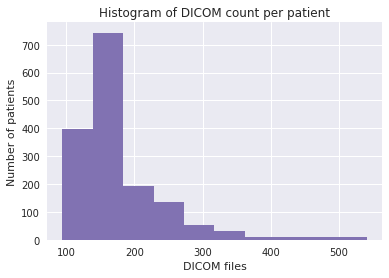

In [11]:
patient_sizes = [len(os.listdir('data/stage1/' + d)) for d in os.listdir('data/stage1')]
plt.hist(patient_sizes, color=p[3])
plt.ylabel('Number of patients')
plt.xlabel('DICOM files')
plt.title('Histogram of DICOM count per patient')

In [5]:
# plot data
# dicom to image
import dicom
def dicom_to_image(filename):
    dcm = dicom.read_file(filename)
    img = dcm.pixel_array
    img[img == -2000] = 0
    return img

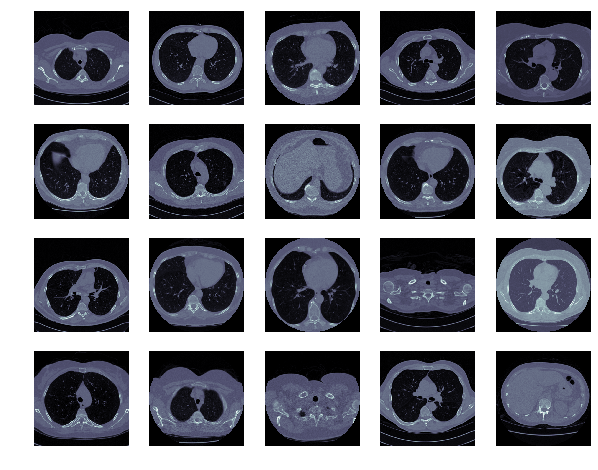

In [6]:
files = glob.glob('data/stage1/*/*.dcm')

f, plots = plt.subplots(4, 5, sharex='col', sharey='row', figsize=(10, 8))
for i in range(20):
    plots[i // 5, i % 5].axis('off')
    plots[i // 5, i % 5].imshow(dicom_to_image(np.random.choice(files)), cmap=plt.cm.bone)

In [7]:
def get_slice_location(dcm):
    return float(dcm[0x0020, 0x1041].value)

# Returns a list of images for that patient_id, in ascending order of Slice Location
def load_patient(patient_id):
    files = glob.glob('data/stage1/{}/*.dcm'.format(patient_id))
    imgs = {}
    for f in files:
        dcm = dicom.read_file(f)
        img = dcm.pixel_array
        img[img == -2000] = 0
        sl = get_slice_location(dcm)
        imgs[sl] = img
        
    # Not a very elegant way to do this
    sorted_imgs = [x[1] for x in sorted(imgs.items(), key=lambda x: x[0])]
    return sorted_imgs

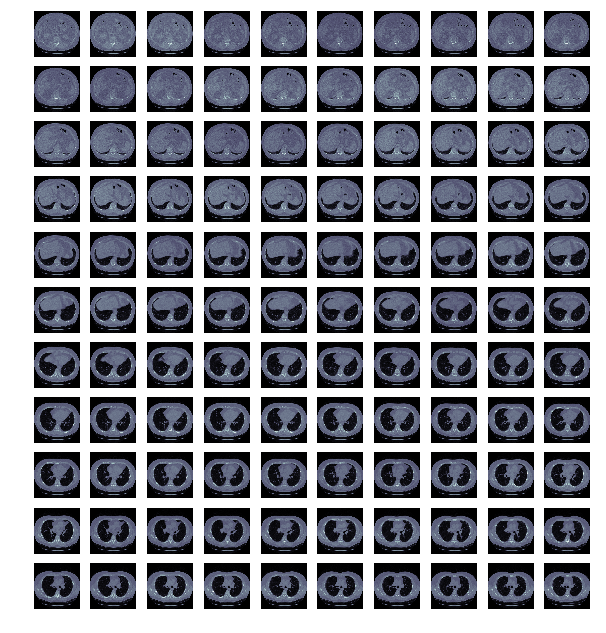

In [8]:
# plot image for patient without cancer with soreted position
pat = load_patient('ffe02fe7d2223743f7fb455dfaff3842')
f, plots = plt.subplots(11, 10, sharex='all', sharey='all', figsize=(10, 11))
for i in range(110):
    plots[i // 10, i % 10].axis('off')
    plots[i // 10, i % 10].imshow(pat[i], cmap=plt.cm.bone)

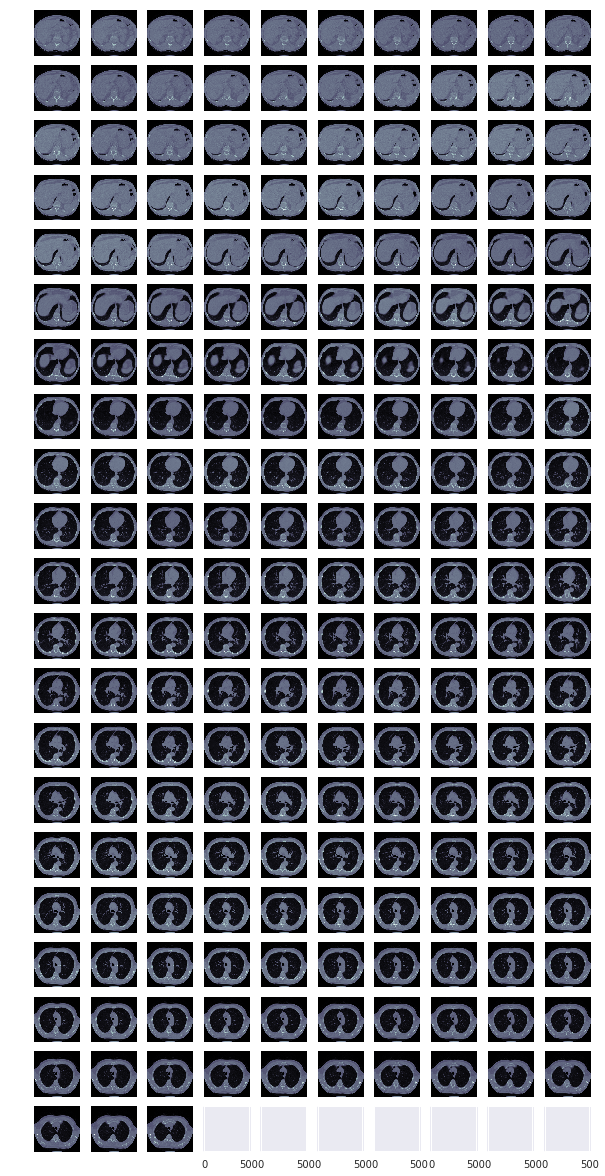

In [9]:
# plot image for patient with cancer
pat = load_patient('fe45462987bacc32dbc7126119999392')
f, plots = plt.subplots(21, 10, sharex='all', sharey='all', figsize=(10, 21))
for i in range(203):
    plots[i // 10, i % 10].axis('off')
    plots[i // 10, i % 10].imshow(pat[i], cmap=plt.cm.bone)

/a/h/bdu01/Envs/deep-venv/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


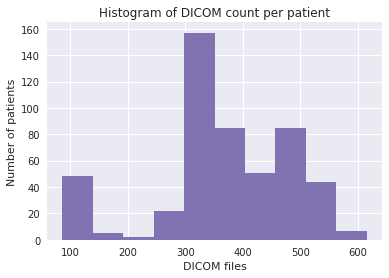

In [4]:
# distribution for stage2 data
patient_sizes = [len(os.listdir('data/stage2/' + d)) for d in os.listdir('data/stage2')]
plt.hist(patient_sizes, color=p[3])
plt.ylabel('Number of patients')
plt.xlabel('DICOM files')
plt.title('Histogram of DICOM count per patient')

In [18]:
sizes = [os.path.getsize(dcm)/1000000 for dcm in glob.glob('data/stage1/*/*.dcm')]
sizes = [float(i) for i in sizes]
print max(sizes)
print('DCM file sizes: min {:.3}MB max {:.3}MB avg {:.3}MB std {:.3}MB'.format(np.min(sizes), 
                                                       np.max(sizes), np.mean(sizes), np.std(sizes)))

0.0
DCM file sizes: min 0.0MB max 0.0MB avg 0.0MB std 0.0MB
